In [18]:
# import Library
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pylab as plt

In [19]:
Data = [ [ [(i + j) / 100] for i in range(5)] for j in range(100)]
target = [ (i + 5) / 100 for i in range(100)]

# print(Data)
# print(target)

In [20]:
data = np.array(Data, dtype = float)
target = np.array(target, dtype = float)

In [21]:
data.shape


(100, 5, 1)

In [23]:
target.shape

(100,)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size = 0.2, random_state = 4)

In [24]:
#RNN Model

model = Sequential()

model.add( LSTM( (1), batch_input_shape = (None, 5 ,1 ), return_sequences = True))
model.add( LSTM ( (1), return_sequences = False))

In [25]:
model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x_train, y_train, epochs = 400, validation_data= (x_test, y_test) )

Epoch 1/400
3/3 [==============================] - 0s 32ms/step - loss: 0.2625 - accuracy: 0.0000e+00 - val_loss: 0.2250 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 21ms/step - loss: 0.2612 - accuracy: 0.0000e+00 - val_loss: 0.2257 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 15ms/step - loss: 0.2596 - accuracy: 0.0000e+00 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 18ms/step - loss: 0.2584 - accuracy: 0.0000e+00 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 20ms/step - loss: 0.2570 - accuracy: 0.0000e+00 - val_loss: 0.2281 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 19ms/step - loss: 0.2559 - accuracy: 0.0000e+00 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 19ms/step - loss: 0.2546 - accuracy: 0.0000e+00 - val_loss

In [34]:
results = model.predict(x_test)

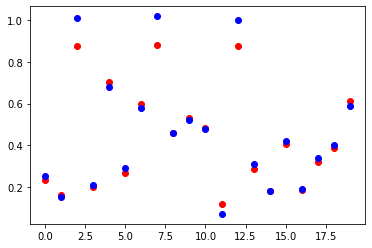

In [35]:
plt.scatter(range(20), results, c = 'r')
plt.scatter(range(20), y_test, c = 'b')


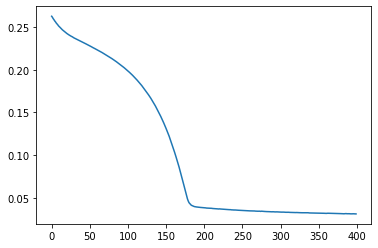

In [36]:
plt.plot(history.history['loss'])
plt.show()